In [1]:
import numpy as np
import numpy.typing as npt
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rc("figure", **{"figsize": (16,10)})
np.random.seed(27182)

from ou_market_making import OrnsteinUhlenbeck, PriceProcess

# Intuition

#### Ornstein–Uhlenbeck Process

$$\begin{aligned}
    \text{The }&\text{continuous case:} \\
    dX_t &= \theta(\mu-X_t)dt + \sigma dB_t \\
    X_{t_{i+1}} &= X_{t_i} + \int_{t_i}^{t_{i+1}} \theta(\mu-X_s)ds + \int_{t_i}^{t_{i+1}} \sigma dB_s \\
    \text{The }&\text{discrete case:} \\
    \Delta X_{t_i} &= \theta(\mu-X_{t_i})\Delta t + \sigma \Delta B_{t_i} \\
    X_{t_{i+1}} &= X_{t_i} + \Delta X_{t_i}
\end{aligned}$$

In [2]:
# GLOBALS

N_STEPS = int(1e3)
X0 = 10

TICKSIZE = 0.1

# Set up parameters from above
theta  = 7
mu     = X0
sigma  = 3
deltat = 1e-2

ou = OrnsteinUhlenbeck(X0, theta, mu, sigma, deltat)
pp = PriceProcess(ou, TICKSIZE)

pp.generate(N_STEPS)

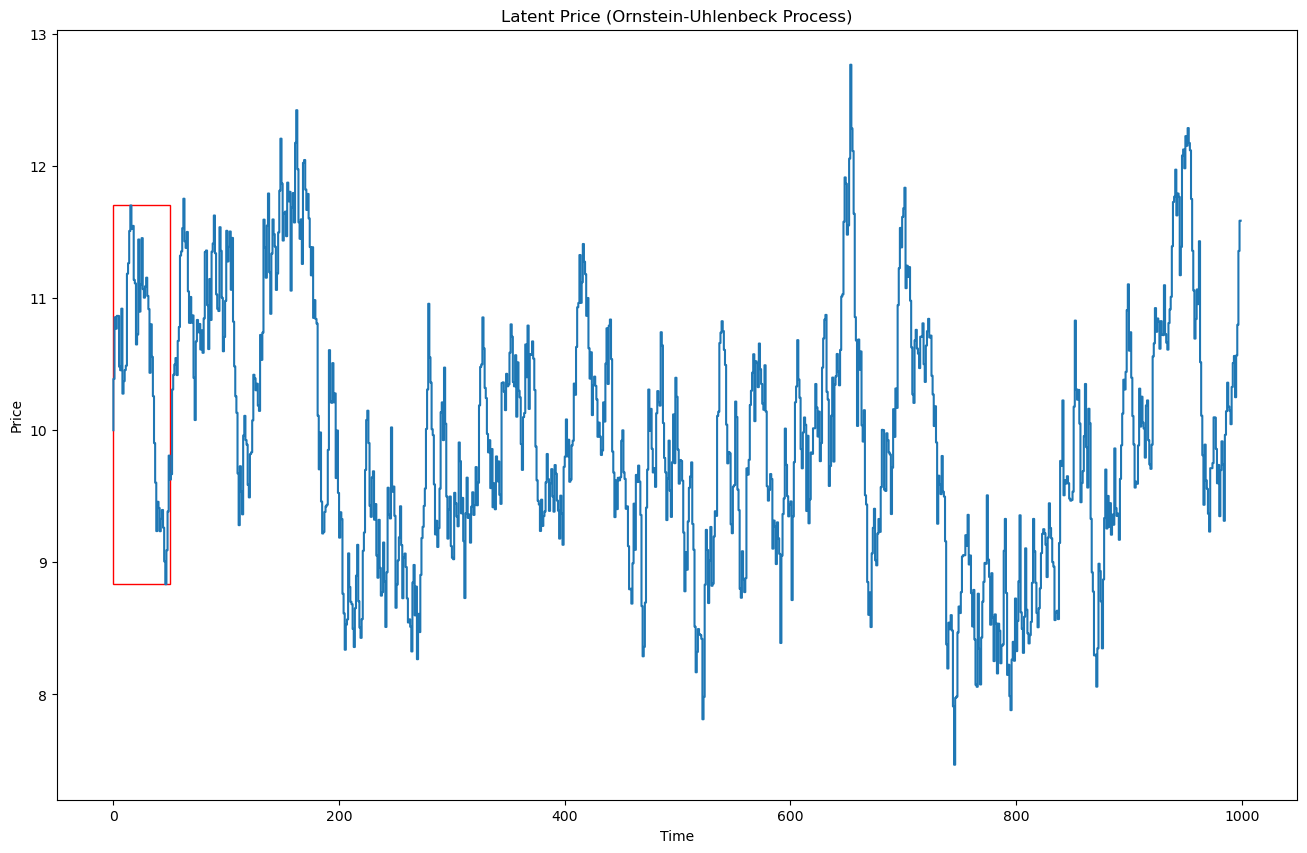

In [4]:
N_FIRST = 50

slice = pp.time < N_FIRST
temp_latent_price = pp.latent_price[slice]
lo, hi = temp_latent_price.min(), temp_latent_price.max()

fig, axis = plt.subplots()

pp.plot_latent_price(axis)
axis.add_patch(Rectangle((0, lo), N_FIRST, hi-lo, edgecolor='r', fill=False))

plt.show()

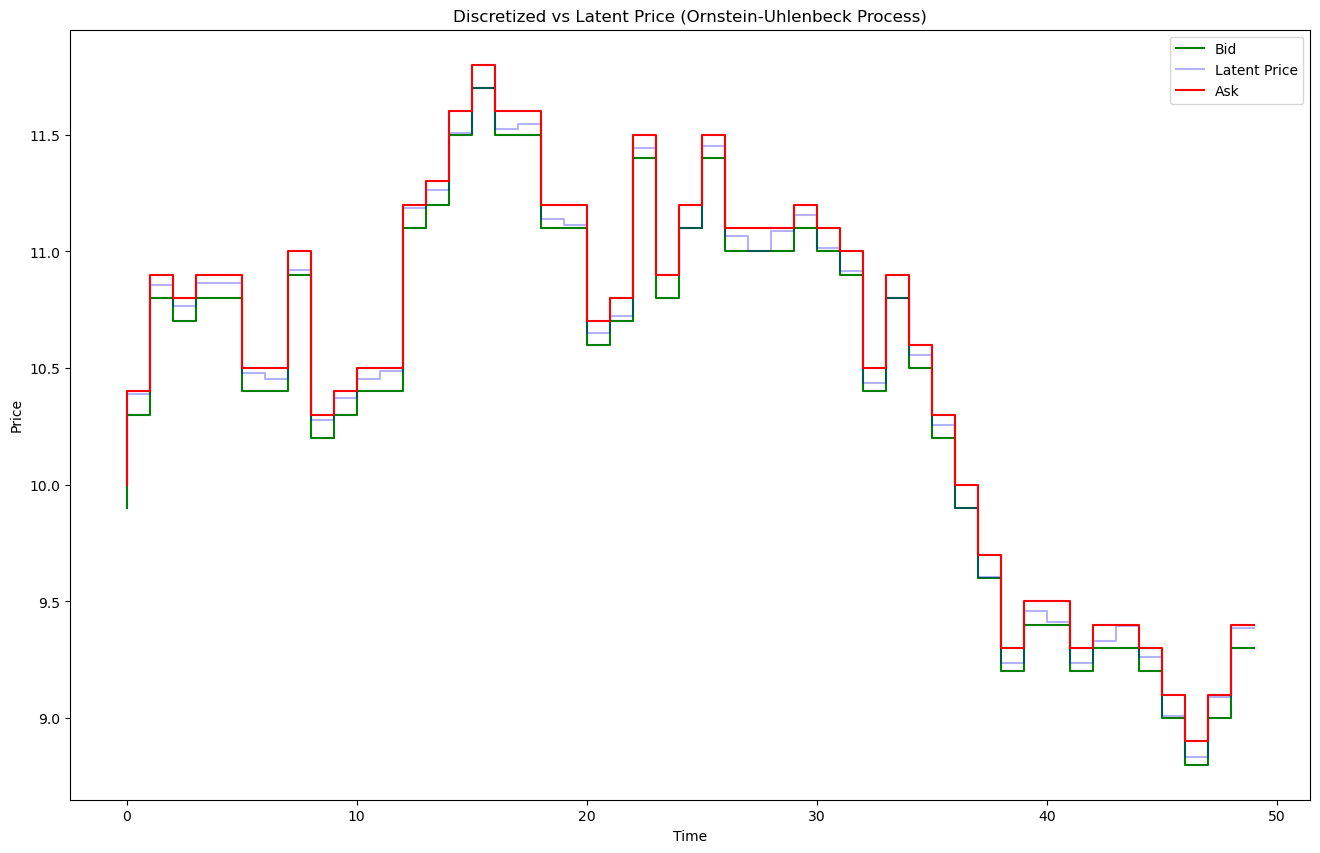

In [5]:
fig, axis = plt.subplots()

pp.plot_bid_ask(axis, slice)

plt.show()

# Intuition

Given the difference equation, we can estimate where 

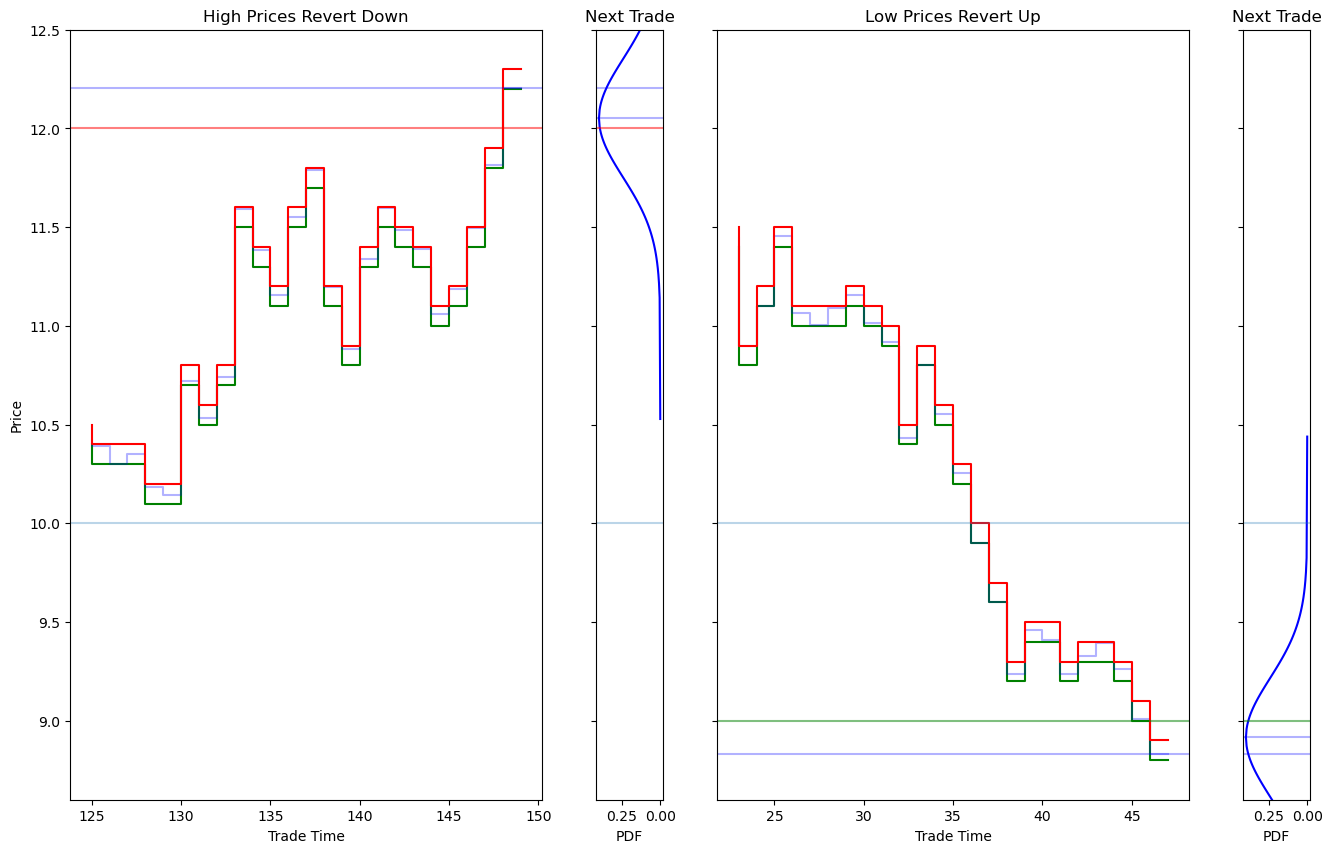

In [6]:
def inverse_pdf(x):
    return np.sqrt(-2*np.log(np.sqrt(2*np.pi)*x))

slice = 25

hi_bound = X0 + 20*TICK_SIZE
lo_bound = X0 - 10*TICK_SIZE

hi_loc = np.argmax(Xt>hi_bound) - slice + 1
lo_loc = np.argmax(Xt<lo_bound) - slice + 1

hi_latent = Xt[hi_loc+slice-1]
lo_latent = Xt[lo_loc+slice-1]
hi_mu = hi_latent + theta * (mu - hi_latent) * deltat
lo_mu = lo_latent + theta * (mu - lo_latent) * deltat

xs = np.linspace(1/np.sqrt(2*np.pi), 1e-6, 100)
ys = inverse_pdf(xs)

stddd = sigma * deltat**0.5

fig, axs = plt.subplots(1, 4, gridspec_kw={"width_ratios": [7,1,7,1]}, sharey=True)

axs[0].step(trade_time[max(hi_loc,0):hi_loc+slice], bidt[max(hi_loc,0):hi_loc+slice], color='g', label="Bid")
axs[0].step(trade_time[max(hi_loc,0):hi_loc+slice], 
            Xt[max(hi_loc,0):hi_loc+slice], color='b', alpha=0.3, label="Latent Price")
axs[0].step(trade_time[max(hi_loc,0):hi_loc+slice], askt[max(hi_loc,0):hi_loc+slice], color='r', label="Ask")
axs[0].axhline(hi_bound, color='r', alpha=0.5)
axs[0].axhline(X0, alpha=0.3)
axs[0].axhline(hi_latent, color='b', alpha=0.3)
axs[0].set_title("High Prices Revert Down")
axs[0].set_xlabel("Trade Time")

axs[1].plot(xs, ys*stddd + hi_mu, color='b')
axs[1].plot(xs, hi_mu-ys*stddd, color='b')
axs[1].invert_xaxis()
axs[1].axhline(hi_bound, color='r', alpha=0.5)
axs[1].axhline(X0, alpha=0.3)
axs[1].axhline(hi_latent, color='b', alpha=0.3)
axs[1].axhline(hi_mu, color='b', alpha=0.3)
axs[1].set_title("Next Trade")
axs[1].set_xlabel("PDF")

axs[2].step(trade_time[max(lo_loc,0):lo_loc+slice], bidt[max(lo_loc,0):lo_loc+slice], color='g', label="Bid")
axs[2].step(trade_time[max(lo_loc,0):lo_loc+slice], 
            Xt[max(lo_loc,0):lo_loc+slice], color='b', alpha=0.3, label="Latent Price")
axs[2].step(trade_time[max(lo_loc,0):lo_loc+slice], askt[max(lo_loc,0):lo_loc+slice], color='r', label="Ask")
axs[2].axhline(lo_bound, color='g', alpha=0.5)
axs[2].axhline(X0, alpha=0.3)
axs[2].axhline(lo_latent, color='b', alpha=0.3)
axs[2].set_title("Low Prices Revert Up")
axs[2].set_xlabel("Trade Time")

axs[3].plot(xs, ys*stddd + lo_mu, color='b')
axs[3].plot(xs, lo_mu-ys*stddd, color='b')
axs[3].invert_xaxis()
axs[3].axhline(lo_bound, color='g', alpha=0.5)
axs[3].axhline(X0, alpha=0.3)
axs[3].axhline(lo_latent, color='b', alpha=0.3)
axs[3].axhline(lo_mu, color='b', alpha=0.3)
axs[3].set_title("Next Trade")
axs[3].set_xlabel("PDF")

axs[0].set_ylabel("Price")
axs[3].set_ylim([bidt[lo_loc+slice-1]-2*TICK_SIZE, askt[hi_loc+slice-1]+2*TICK_SIZE])
plt.show()

In [8]:
bid_grid = np.arange(0, X0, TICK_SIZE)
ask_grid = np.arange(X0, 2*X0, TICK_SIZE)

theta * (mu - ask_grid) * deltat

array([ 0.   , -0.007, -0.014, -0.021, -0.028, -0.035, -0.042, -0.049,
       -0.056, -0.063, -0.07 , -0.077, -0.084, -0.091, -0.098, -0.105,
       -0.112, -0.119, -0.126, -0.133, -0.14 , -0.147, -0.154, -0.161,
       -0.168, -0.175, -0.182, -0.189, -0.196, -0.203, -0.21 , -0.217,
       -0.224, -0.231, -0.238, -0.245, -0.252, -0.259, -0.266, -0.273,
       -0.28 , -0.287, -0.294, -0.301, -0.308, -0.315, -0.322, -0.329,
       -0.336, -0.343, -0.35 , -0.357, -0.364, -0.371, -0.378, -0.385,
       -0.392, -0.399, -0.406, -0.413, -0.42 , -0.427, -0.434, -0.441,
       -0.448, -0.455, -0.462, -0.469, -0.476, -0.483, -0.49 , -0.497,
       -0.504, -0.511, -0.518, -0.525, -0.532, -0.539, -0.546, -0.553,
       -0.56 , -0.567, -0.574, -0.581, -0.588, -0.595, -0.602, -0.609,
       -0.616, -0.623, -0.63 , -0.637, -0.644, -0.651, -0.658, -0.665,
       -0.672, -0.679, -0.686, -0.693])